In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
data = load_breast_cancer()

In [4]:
x = data.data

In [5]:
y = data.target

In [6]:
x.shape

(569, 30)

In [7]:
lrl1 = LogisticRegression(penalty = "l1", solver="liblinear", C=0.5, max_iter=1000)
lrl2 = LogisticRegression(penalty = "l2", solver="liblinear", C=0.5, max_iter=1000)

In [8]:
lrl1 = lrl1.fit(x,y)
lrl1.coef_

array([[ 3.99286446,  0.03171194, -0.13609862, -0.01621505,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50511358,  0.        , -0.07127436,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24559314, -0.12842446, -0.01441491,  0.        ,
         0.        , -2.04957707,  0.        ,  0.        ,  0.        ]])

In [9]:
lrl2 = lrl2.fit(x,y)
lrl2.coef_

array([[ 1.61520501e+00,  1.03165052e-01,  4.89949805e-02,
        -4.54506240e-03, -9.48008257e-02, -3.01421093e-01,
        -4.56859957e-01, -2.23258616e-01, -1.36553746e-01,
        -1.93906450e-02,  1.51864035e-02,  8.84898752e-01,
         1.16165541e-01, -9.44763174e-02, -9.89655585e-03,
        -2.29726134e-02, -5.65958341e-02, -2.71050955e-02,
        -2.78527986e-02,  3.23035311e-04,  1.25588950e+00,
        -3.02228839e-01, -1.72470649e-01, -2.21057137e-02,
        -1.74443696e-01, -8.78236006e-01, -1.16396034e+00,
        -4.29422377e-01, -4.23200361e-01, -8.69294106e-02]])

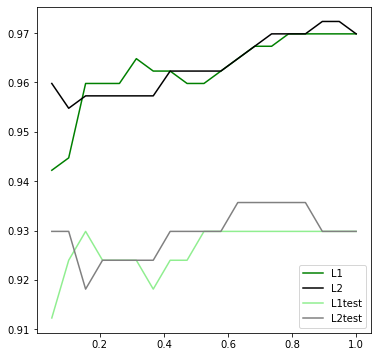

In [11]:
l1 = []
l2 = []
l1test = []
l2test = []

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,1,19):
    lrl1 = LogisticRegression(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LogisticRegression(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示,右下角
plt.show()